# 5주차 복습문제

## 1번 K-means와 GMM실습
#### - 'winequality-red.csv'는 와인의 품질을 평가한 데이터이다.

### (1)  데이터를 wine으로 저장하고, 'quality'변수를 종속변수로 하여 K-means군집화를 수행하시오
##### n_components = 3, random_state = 0

In [35]:
import pandas as pd

wine=pd.read_csv("winequality-red.csv")

target=wine['quality']

wine=wine.drop(wine[['quality']], axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [36]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0)
kmeans.fit(wine)

print(kmeans.labels_)

[0 2 2 ... 2 2 2]


### (2)  wine에 kmeans_cluster변수를 추가하여 군집화 결과를 저장하고  quality별  kmeans_cluster수행결과의 value_counts를 출력하시오(groupby)

In [37]:
wine['quality']=target
wine['kmeans_cluster']=kmeans.labels_

# target값과 cluster값 개수 비교
wine_result=wine.groupby(['quality'])['kmeans_cluster'].value_counts()
print(wine_result)

quality  kmeans_cluster
3        0                   7
         2                   3
4        0                  33
         2                  15
         1                   5
5        0                 282
         2                 224
         1                 175
6        0                 346
         2                 247
         1                  45
7        0                 131
         2                  54
         1                  14
8        0                  13
         2                   3
         1                   2
Name: kmeans_cluster, dtype: int64


### (3)  데이터를 wine으로 저장하고, 'quality'변수를 종속변수로 하여 GMM 군집화를 수행하시오
###### n_components = 3, random_state = 0

In [38]:
import pandas as pd

wine=pd.read_csv("winequality-red.csv")

target=wine['quality']

wine=wine.drop(wine[['quality']], axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [39]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(wine)
gmm_cluster_labels=gmm.predict(wine)

# 군집화 결과
wine['gmm_cluster']=gmm_cluster_labels

### (4)  wine에 gmm_cluster변수를 추가하여 군집화 결과를 저장하고,의  quality별  gmm_cluster결과의  value_counts를 출력하시오(groupby)

In [41]:
wine['quality']=target
wine['gmm_cluster']=gmm_cluster_labels

# target값과 cluster값 개수 비교
wine_result=wine.groupby(['quality'])['gmm_cluster'].value_counts()
print(wine_result)

quality  gmm_cluster
3        0                5
         1                3
         2                2
4        1               29
         0               17
         2                7
5        1              382
         2              194
         0              105
6        1              491
         0               86
         2               61
7        1              150
         0               46
         2                3
8        1               13
         0                5
Name: gmm_cluster, dtype: int64


## 2번 GMM과 K-평균의 비교
#### - eps와 min_samples에 따라 clustering이 어떻게 달라지는 지 확인해봅시다.

### (1)  make_blobs함수를 통해 400개의 데이터세트, 3개의 군집세트(X, y)를 만드시오
###### n_samples= 400, n_features=2, centers = 3, cluster_std = 0.5, random_state = 0

In [42]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=0.5, random_state=0)

### (2)  생상한 데이터를 길게 늘어난 타원형의 데이터 세트로 변환하여 X_aniso에 저장하고, feature 데이터 세트와 y결과 값을 clusterDF라는 이름의 데이터프레임으로 저장하시오

In [47]:
import numpy as np

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

clusterDF=pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-2.194330,3.435568,2
1,-2.041378,3.174653,2
2,-0.566790,2.158475,0


### (3)  3개의 군집 기반 Kmeans를 X_aniso데이터 세트에 적용하여 시각화하시오
###### iscluster = False

In [50]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

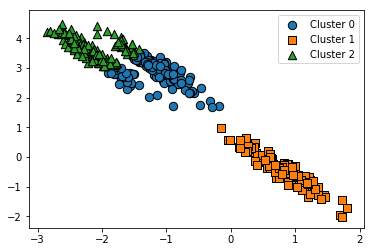

In [54]:
import matplotlib.pyplot as plt

kmeans=KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label


visualize_cluster_plot(None, clusterDF, 'kmeans_label', iscenter=False)

### (4)  3개의 n_components기반  GMM을 X_aniso데이터 세트에 적용하여 시각화하시오
###### iscluster = False

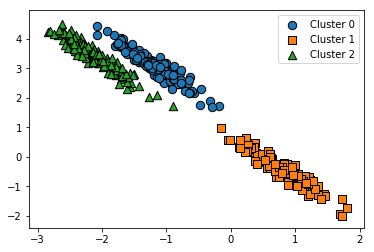

In [55]:
gmm=GaussianMixture(n_components=3, random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GMM은 cluster_centers_속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

## 3번 DBSCAN실습
#### - eps와 min_samples에 따라 clustering이 어떻게 달라지는 지 확인해봅시다.

### (1)  make_moons 함수로 나선형 모양의 데이터 셋을 생성하고 visualize_cluster_plot()으로 시각화 하세요. (n_samples = 500, noise=0.1)

In [110]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

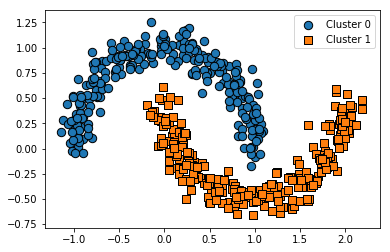

In [111]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

X,y=make_moons(n_samples=500, noise=0.1)

clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

### (2) DBSCAN으로 데이터를 clustering 한 후, visualize_cluster_plot()을 이용하여 시각화하세요(eps=0.2, min_samples=10, metric='euclidean')

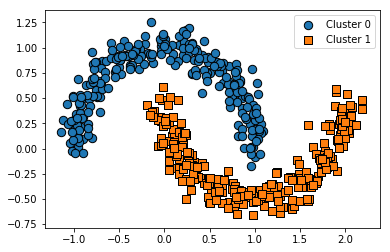

In [112]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

### (3) eps와 min_samples에 따라 clustering이 어떻게 변화하는지 시각화 한 후, 어떻게 달라지는 지 서술하세요.
- samples : [5, 7, 10] / eps : [0.15, 0.2]
- hint: for문과 subplot을 적절히 이용
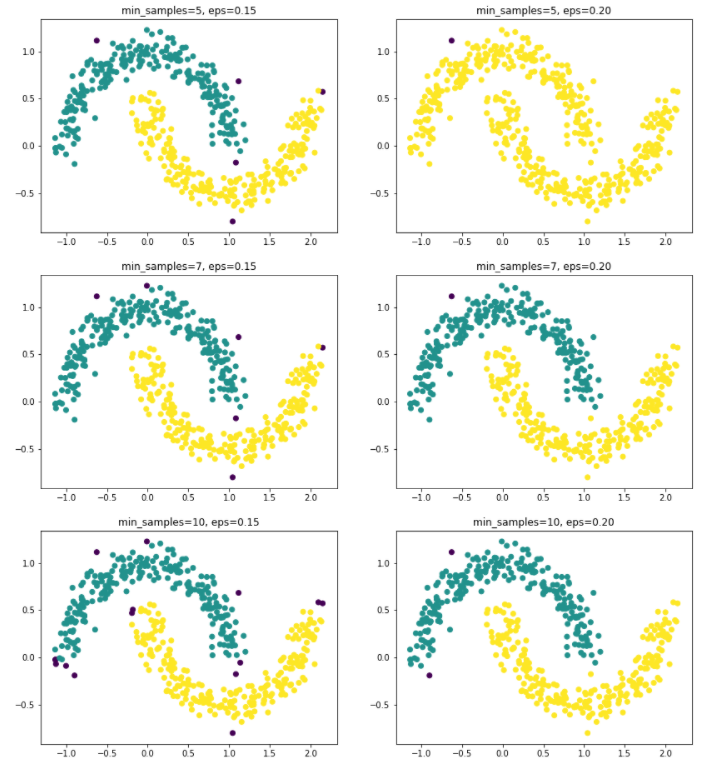

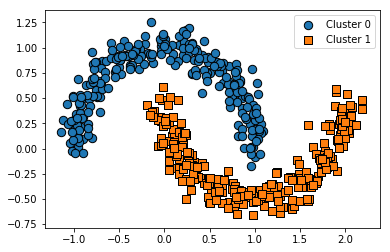

In [114]:
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

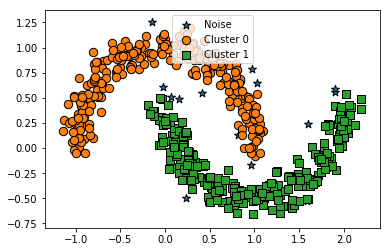

In [119]:
# eps 0.2 -> 0.15,  samples 7->10
# 좁은 반경내에서 더 많은 데이터를 포함시켜야하기 때문에 많은 noise가 발생

dbscan = DBSCAN(eps=0.15, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

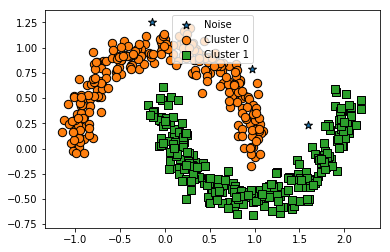

In [117]:
# sample 10->5
# 같은 반경내에서 더 적은 데이터를 포함시켜야 하기 때문에 noise가 줄어든다.

dbscan = DBSCAN(eps=0.15, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

- min_samples을 크게할수록 주어진 반경내에서 더 많은 데이터를 포함시켜야 하기 때문에 noise 개수가 많아진다.
- eps 값을 크게할수록 반경이 커지기때문에, 노이즈 개수가 줄어든다.

## 문제 4. 왜곡 데이터 처리  
### 1) diamonds.csv 불러와서 dia_df에 저장

In [1]:
import datetime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dia_df=pd.read_csv('diamonds.csv', usecols=range(1,11))
dia_df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


### 2) depth, table 칼럼 값 분포 확인하기
-  hist() 이용하기

(array([3.0000e+00, 0.0000e+00, 1.1000e+01, 2.6800e+02, 1.2078e+04,
        4.0363e+04, 1.1320e+03, 7.8000e+01, 4.0000e+00, 3.0000e+00]),
 array([43. , 46.6, 50.2, 53.8, 57.4, 61. , 64.6, 68.2, 71.8, 75.4, 79. ]),
 <a list of 10 Patch objects>)

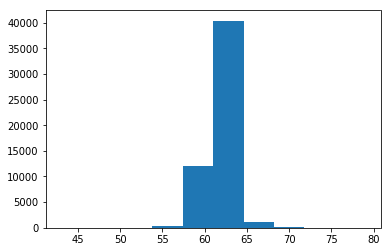

In [2]:
plt.hist(dia_df['depth'])

(array([2.0000e+00, 6.5700e+02, 3.7554e+04, 1.5138e+04, 5.6300e+02,
        2.3000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([43. , 48.2, 53.4, 58.6, 63.8, 69. , 74.2, 79.4, 84.6, 89.8, 95. ]),
 <a list of 10 Patch objects>)

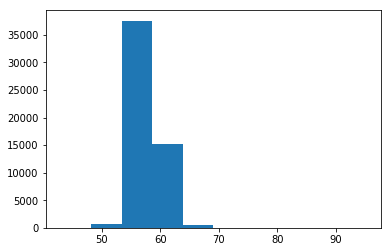

In [3]:
plt.hist(dia_df['table'])

### 3) depth, table 칼럼에 K-평균 군집 적용하기

#### 3-1) 실루엣 스코어 구하기
######    - 먼저 데이터 세트의 평균 표준편차 재조정 
######      - 군집 3개 구성
######      - 출력 결과  
          실루엣 스코어는 : 0.xxx

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

dia=dia_df.drop(['carat','cut','color','clarity','price','x','y','z'], axis=1)

dia_skl=StandardScaler().fit_transform(dia)
dia_skl=pd.DataFrame(dia_skl)
dia_skl.head()

,0,1
0,-0.174092,-1.099672
1,-1.360738,1.585529
2,-3.385019,3.375663
3,0.454133,0.242928
4,1.082358,0.242928


In [6]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, random_state=0).fit(dia_skl)
dia_skl['cluster']=kmeans.labels_

average_score=silhouette_score(dia_skl, dia_skl['cluster'])
print('실루엣 스코어는 :{0:.3f}'.format(average_score))


실루엣 스코어는 e:0.550


#### 3-2) 각 군집별 실루엣 계수, 데이터 구성 시각화
#####      - visualize_silhouette(), visualize_kmeans_plot_multi() 함수 사용
#####      - 군집 개수 2~5개 변화시키면서 확인

In [7]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [8]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

KeyboardInterrupt: 

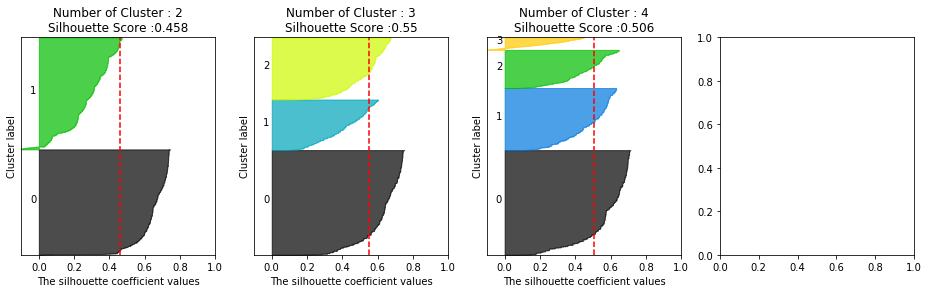

In [9]:
visualize_silhouette([ 2, 3, 4, 5], dia_skl)

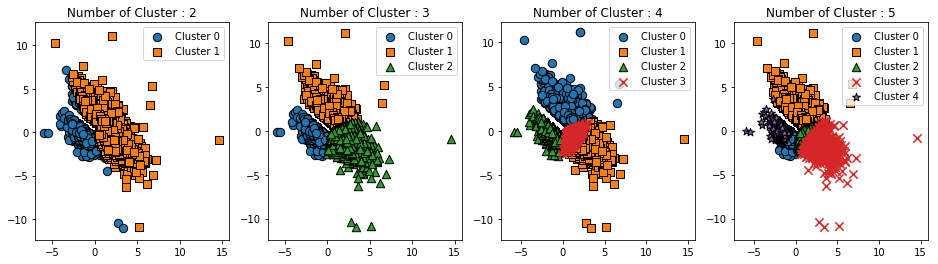

In [10]:
visualize_kmeans_plot_multi([ 2, 3, 4, 5], dia_skl)

### 4) depth, table 칼럼 *로그변환 *후 K-평균 군집 적용하기
#### 4-1) 실루엣 스코어 구하기
#####      -  데이터 세트의 평균 표준편차 재조정 
#####      - 군집 3개 구성
#####      - 출력 결과  
          실루엣 스코어는 : 0.xxx

In [11]:
dia=dia_df.drop(['carat','cut','color','clarity','price','x','y','z'], axis=1)
dia['table']=np.log(dia['table'])
dia['depth']=np.log(dia['depth'])
dia.head()

,depth,table
0,4.119037,4.007333
1,4.091006,4.110874
2,4.041295,4.174387
3,4.133565,4.060443
4,4.147885,4.060443


In [13]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, random_state=0).fit(dia)
dia['cluster']=kmeans.labels_

average_score=silhouette_score(dia, dia['cluster'])
print('실루엣 스코어는 :{0:.3f}'.format(average_score))

실루엣 스코어는 :0.968


#### 4-2) 각 군집별 실루엣 계수, 데이터 구성 시각화
#####      - visualize_silhouette(), visualize_kmeans_plot_multi() 함수 사용
#####      - 군집 개수 2~5개 변화시키면서 확인

KeyboardInterrupt: 

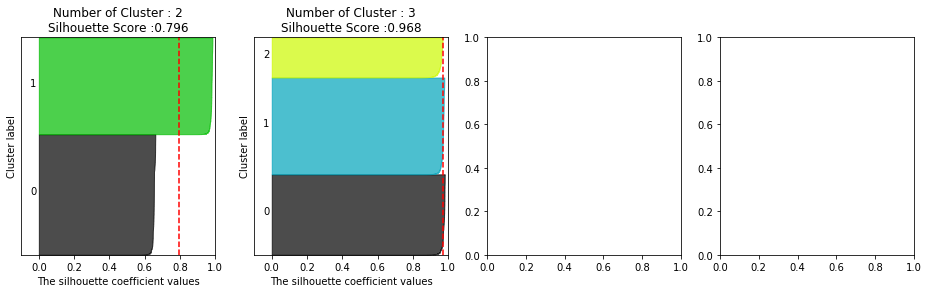

In [16]:
visualize_silhouette([ 2, 3, 4, 5], dia)

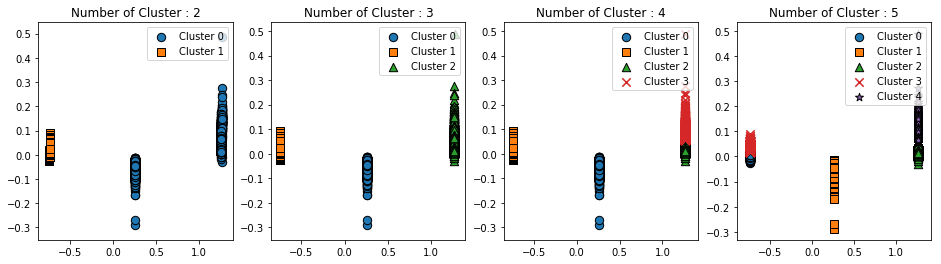

In [15]:
visualize_kmeans_plot_multi([ 2, 3, 4, 5], dia)